# **Student Information**
  
Tên: Giang Gia Bảo  
MSSV: 20127446  
Lớp: 20TGMT01  

# 0. Import library

In [1]:
# Importing the libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [2]:
# set NumPy options
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 20)

In [3]:
# read CSV data with Pandas
data = pd.read_csv("data/restaurants.csv")

# 1. Display some data from CSV-file

## 1.1 Show some data variables

In [4]:
print("## Data:")
print(data)

## Data:
                                Name  \
0                              Local   
1                      The G.T. ROAD   
2                            Tamasha   
3                  The Junkyard Cafe   
4     Chili's American Grill and Bar   
...                              ...   
6588                   Shree Rathnam   
6589                     Cafe Delish   
6590                     3 K Resorts   
6591                       Dovka Bar   
6592                     Urban Vibes   

                                               Location           Locality  \
0          Scindia House,Connaught Place, Central Delhi      Central Delhi   
1                M-Block,Connaught Place, Central Delhi      Central Delhi   
2                        Connaught Place, Central Delhi      Central Delhi   
3                        Connaught Place, Central Delhi      Central Delhi   
4                M-Block,Connaught Place, Central Delhi      Central Delhi   
...                                       

In [5]:
# print first 5 rows of csv-file (5rows x 21columns)
print("## Head:")
print(data.head())

## Head:
                             Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  
0           North Indian,  Finger Food,  Continental     4.1   2415  2000  
1                                       North Indian     4.3   2363  1500  
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000  
3  North Indian,  M

In [6]:
# print last 5 rows of csv-file (5rows x 21columns)
print("## Tail:")
print(data.tail())

## Tail:
               Name                                           Location  \
6588  Shree Rathnam                 Wave Mall,BRS Nagar, West Ludhiana   
6589    Cafe Delish          Radisson Blu,Rajguru Nagar, West Ludhiana   
6590    3 K Resorts                           BRS Nagar, West Ludhiana   
6591      Dovka Bar  Nirvana Hotel Banquets Club,PAU, Central Ludhiana   
6592    Urban Vibes                         Aggar Nagar, West Ludhiana   

               Locality      City  \
6588      West Ludhiana  Ludhiana   
6589      West Ludhiana  Ludhiana   
6590      West Ludhiana  Ludhiana   
6591   Central Ludhiana  Ludhiana   
6592      West Ludhiana  Ludhiana   

                                                Cuisine  Rating  Votes  Cost  
6588                                       South Indian     4.1     20   600  
6589  Multi-Cuisine,  North Indian,  Continental,  A...     4.4     48  3100  
6590                                       North Indian     1.0      1  1100  
6591   

In [7]:
# print a concise summary of csv-file
print("## Info:")
data.info()

## Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB


In [8]:
# The summary consist of count, max, min, mean, standard deviation and subset of its
data.describe()

,Rating,Votes,Cost
count,6593.000000,6593.000000,6593.000000
mean,4.088200,119.420143,1102.798271
std,0.670031,261.849704,716.935212
min,1.000000,1.000000,100.000000
25%,3.900000,6.000000,500.000000
50%,4.200000,31.000000,900.000000
75%,4.400000,115.000000,1500.000000
max,5.000000,5016.000000,8000.000000


In [9]:
# get X column, y column
X = data.loc[:, 'Rating':]
y = data.loc[:,'City']

In [10]:
# show X column (Rating, Votes, Cost)
X

,Rating,Votes,Cost
0,4.1,2415,2000
1,4.3,2363,1500
2,4.2,5016,2000
3,4.2,2821,1800
4,4.4,1094,2000
...,...,...,...
6588,4.1,20,600
6589,4.4,48,3100
6590,1.0,1,1100
6591,4.3,3,1500


In [11]:
# show y column (City name)
y

0          Delhi
1          Delhi
2          Delhi
3          Delhi
4          Delhi
          ...   
6588    Ludhiana
6589    Ludhiana
6590    Ludhiana
6591    Ludhiana
6592    Ludhiana
Name: City, Length: 6593, dtype: object

## 1.2 Visualizing some data from CSV-file

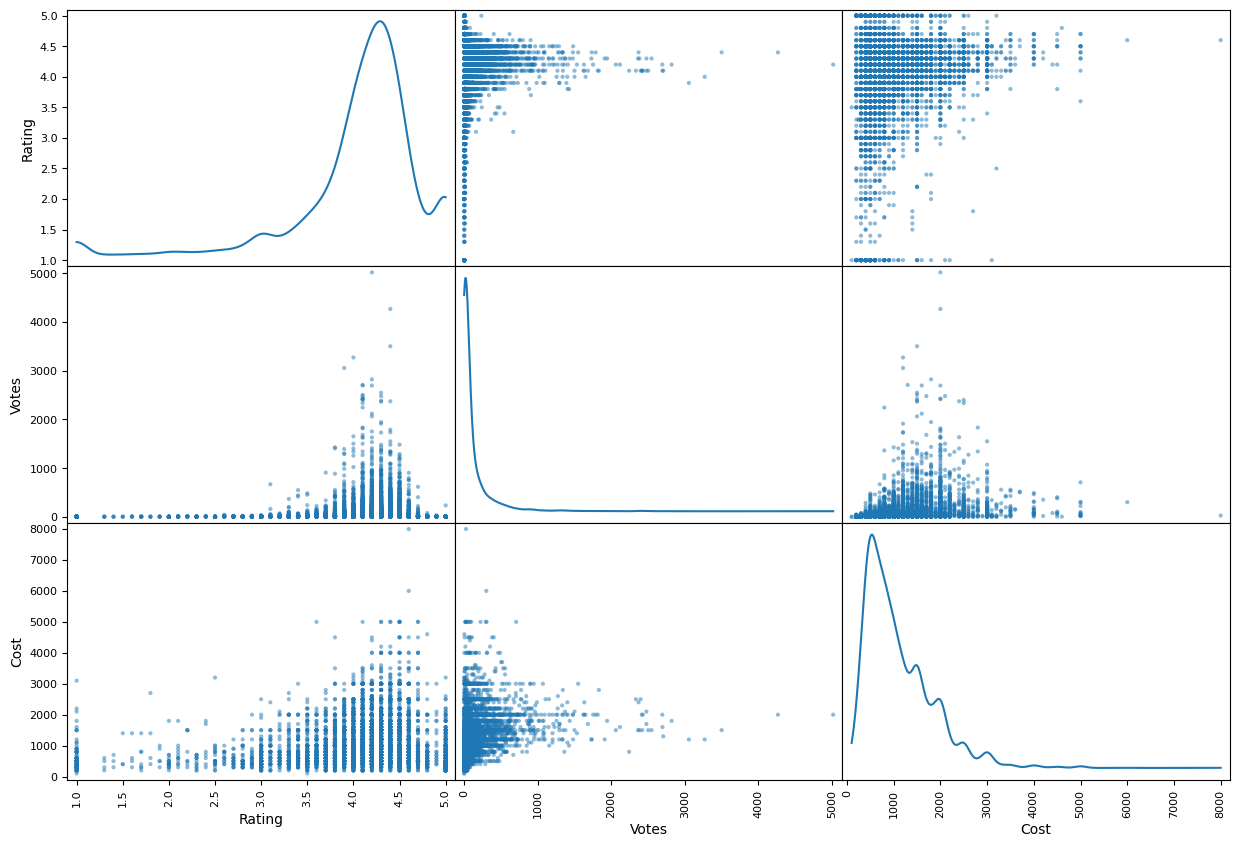

In [12]:
# plotting multivariate data
pd.plotting.scatter_matrix(data.loc[:, "Rating":"Cost"], diagonal="kde", figsize=(15, 10))
plt.show()

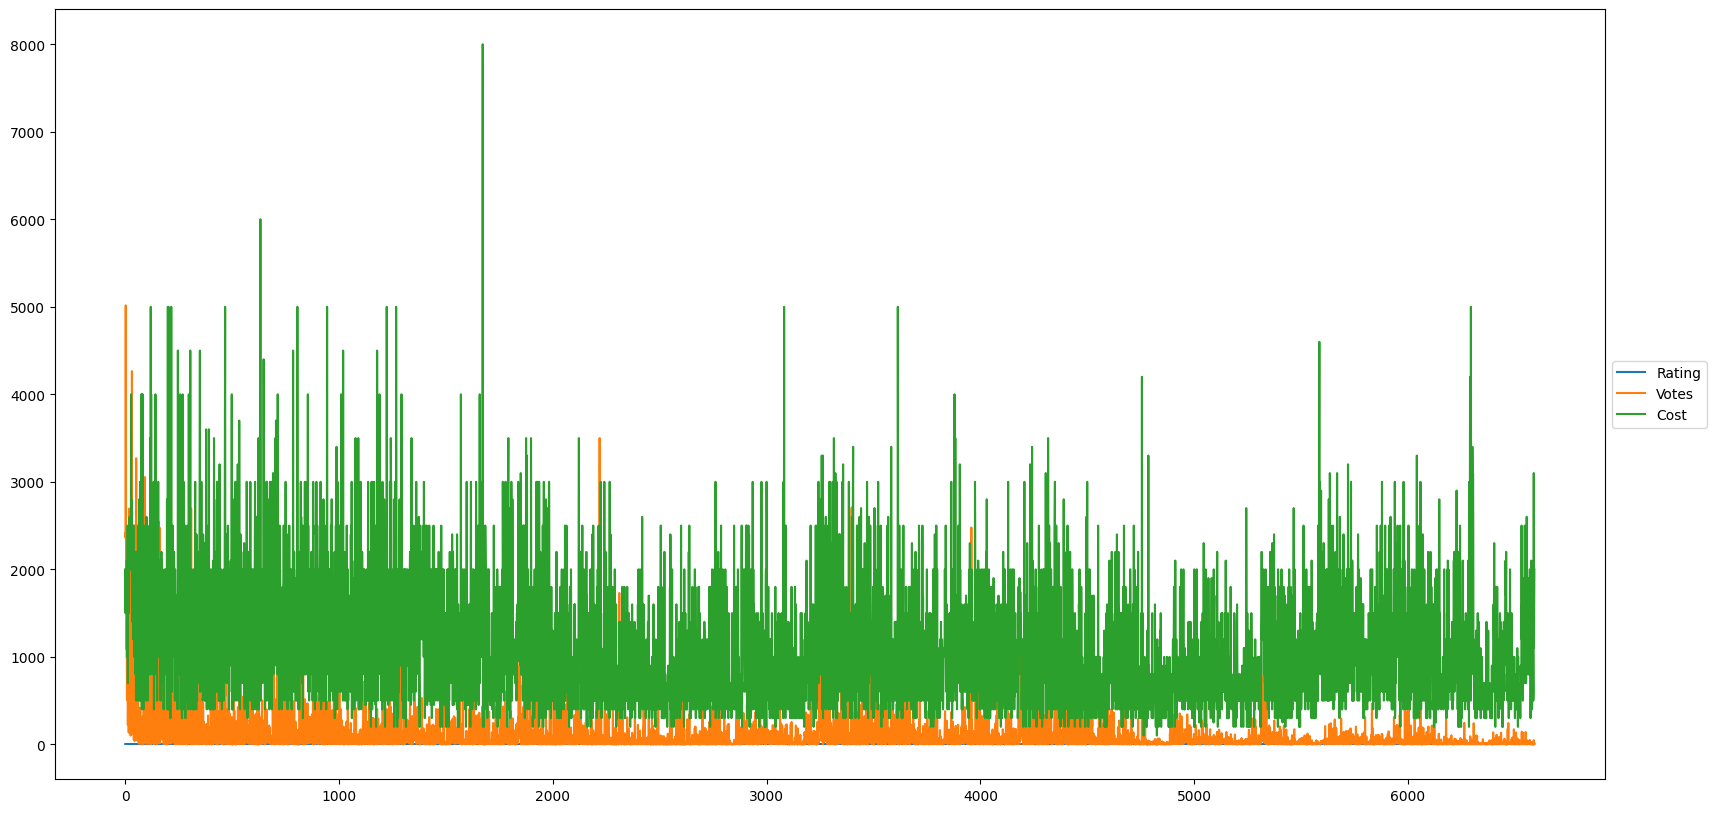

In [13]:
# plotting multivariate data (Rating, Votes, Cost)
ax = data[["Rating", "Votes", "Cost"]].plot(figsize=(20, 10))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

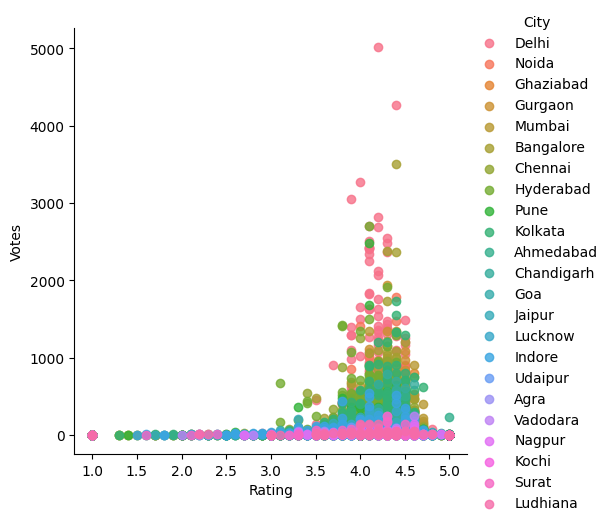

In [14]:
# scatter plot for Rating and Votes of each City
sns.lmplot(x ='Rating', y ='Votes', data=data, hue="City", fit_reg=False)

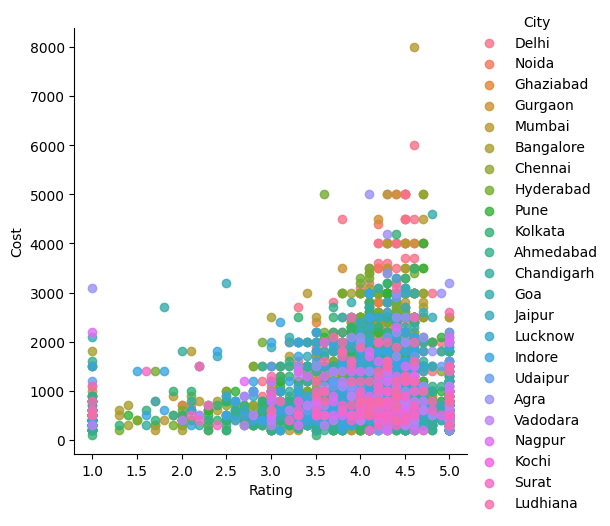

In [15]:
# scatter plot for Rating and Cost of each City
sns.lmplot(x ='Rating', y ='Cost', fit_reg = False, hue = 'City', data = data)

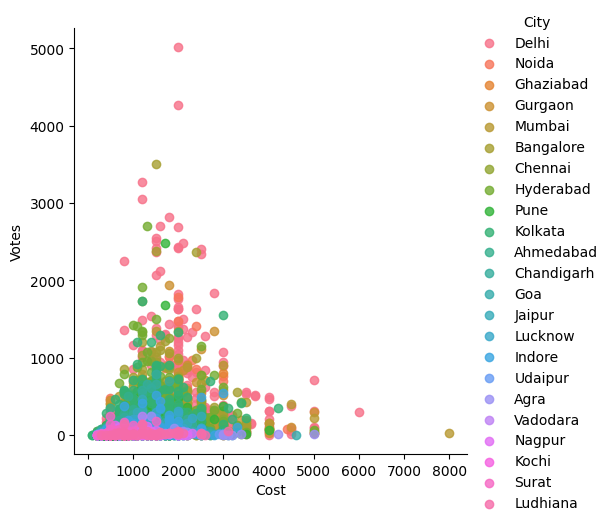

In [16]:
# scatter plot for Votes and Cost of each City
sns.lmplot(x ='Cost', y ='Votes', fit_reg = False, hue = 'City', data = data)

# 2.  Implement and calculating some basic multivariate analysis with visualization

In [17]:
# calculating summary statistics for multivariate data
print("Mean:")
print(X.apply(np.mean))
print("Standard deviation:")
print(X.apply(np.std))
print("Max:")
print(X.apply(np.max))
print("Min:")
print(X.apply(np.min))

Mean:
Rating       4.088200
Votes      119.420143
Cost      1102.798271
dtype: float64
Standard deviation:
Rating      0.669980
Votes     261.829845
Cost      716.880839
dtype: float64
Max:
Rating       5.0
Votes     5016.0
Cost      8000.0
dtype: float64
Min:
Rating      1.0
Votes       1.0
Cost      100.0
dtype: float64


In [18]:
# means and variances per group
def print_mean_and_sd_by_group(variables, group_variable):
    data_group_by = variables.groupby(group_variable)

    print("## Means:")
    print(data_group_by.apply(np.mean))

    print("\n## Standard deviations:")
    print(data_group_by.apply(np.std))

    print("\n## Sample sizes:")
    print(pd.DataFrame(data_group_by.apply(len)))

# calculating mean and variances per group
print_mean_and_sd_by_group(X, y)

## Means:
              Rating       Votes         Cost
City                                         
Agra        4.238667   19.613333  1320.000000
Ahmedabad   4.202899   50.422705   777.294686
Bangalore   4.029931  100.210010   924.288518
Chandigarh  4.137500   53.083333   984.848485
Chennai     4.025258   80.074742   937.113402
...              ...         ...          ...
Noida       4.193836  200.753425  1399.315068
Pune        4.078632   95.957265  1096.723647
Surat       3.964062   33.500000   709.375000
Udaipur     4.072093   19.953488  1120.930233
Vadodara    4.131868   16.000000   612.087912

[23 rows x 3 columns]

## Standard deviations:
              Rating       Votes        Cost
City                                        
Agra        0.620300   32.618560  959.027285
Ahmedabad   0.581968   71.383245  396.593496
Bangalore   0.809752  237.602081  607.696272
Chandigarh  0.743912  109.561941  539.410431
Chennai     0.688852  132.274578  610.656160
...              ...         

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dty

In [19]:
# within-groups variance for a variable
def calc_within_groups_variance(variable, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    # get the mean and standard deviation for each group:
    num_total = 0
    denom_total = 0
    for level_i in levels:
        level_i_data = variable[group_variable == level_i]
        level_i_length = len(level_i_data)
        # get the standard deviation for group i:
        sdi = np.std(level_i_data)
        num_i = level_i_length * sdi ** 2
        denom_i = level_i_length
        num_total = num_total + num_i
        denom_total = denom_total + denom_i
    # calculate the within-groups variance
    v_w = num_total / (denom_total - num_levels)
    return v_w


print("## v_w:")
print(calc_within_groups_variance(X.Rating, y))

## v_w:
0.4403532117485856


In [20]:
# between-groups variance for a variable
def calc_between_groups_variance(variable, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    # calculate the overall grand mean:
    grand_mean = np.mean(variable)
    # get the mean and standard deviation for each group:
    num_total = 0
    denom_total = 0
    for level_i in levels:
        level_i_data = variable[group_variable == level_i]
        level_i_length = len(level_i_data)
        # get the mean and standard deviation for group i:
        mean_i = np.mean(level_i_data)
        sdi = np.std(level_i_data)
        num_i = level_i_length * ((mean_i - grand_mean) ** 2)
        denom_i = level_i_length
        num_total = num_total + num_i
        denom_total = denom_total + denom_i
    # calculate the between-groups variance
    v_b = num_total / (num_levels - 1)
    return v_b


print("## v_b:")
print(calc_between_groups_variance(X.Votes, y))

## v_b:
1830116.0236454236


In [21]:
def calc_separations(variables, group_variable):
    # calculate the separation for each variable
    for variable_name in variables:
        variable_i = variables[variable_name]
        v_w = calc_within_groups_variance(variable_i, group_variable)
        v_b = calc_between_groups_variance(variable_i, group_variable)
        sep = v_b / v_w
        print("variable", variable_name, "Vw=", v_w, "Vb=", v_b, "separation=", sep)


calc_separations(X, y)

variable Rating Vw= 0.4403532117485856 Vb= 3.0136967332167104 separation= 6.84381685613172
variable Votes Vw= 62666.61973894469 Vb= 1830116.0236454236 separation= 29.204000970042475
variable Cost Vw= 456108.3642440714 Vb= 17801378.300760847 separation= 39.02883546164267


In [22]:
# within-groups covariance for two variables
def calc_within_groups_covariance(variable1, variable2, group_variable):
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    cov_w = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for level_i in levels:
        level_i_data1 = variable1[group_variable == level_i]
        level_i_data2 = variable2[group_variable == level_i]
        mean1 = np.mean(level_i_data1)
        mean2 = np.mean(level_i_data2)
        level_i_length = len(level_i_data1)
        # get the covariance for this group:
        term1 = 0.0
        for level_i_data1j, level_i_data2j in zip(level_i_data1, level_i_data2):
            term1 += (level_i_data1j - mean1) * (level_i_data2j - mean2)
        cov_group_i = term1  # covariance for this group
        cov_w += cov_group_i
    total_length = len(variable1)
    cov_w /= total_length - num_levels
    return cov_w


print("## cov_w:")
print(calc_within_groups_covariance(X.Rating, X.Votes, y))

## cov_w:
13.778933911232212


In [23]:
# between-groups covariance for two variables
def calc_between_groups_covariance(variable1, variable2, group_variable):
    # find out how many values the group variable can take
    levels = sorted(set(group_variable))
    num_levels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    cov_b = 0.0
    for level_i in levels:
        level_i_data1 = variable1[group_variable == level_i]
        level_i_data2 = variable2[group_variable == level_i]
        mean1 = np.mean(level_i_data1)
        mean2 = np.mean(level_i_data2)
        level_i_length = len(level_i_data1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * level_i_length
        cov_b += term1
    cov_b /= num_levels - 1
    return cov_b

# calculating covariance from Rating and Votes in City group(y2)
print("## cov_b:")
print(calc_between_groups_covariance(X.Rating, X.Votes, y))

## cov_b:
837.90869525341


p-value:	 1.78251487378652e-14
cor:		 0.0942126651283519
          Rating     Votes      Cost
Rating  1.000000  0.094213  0.149745
Votes   0.094213  1.000000  0.311000
Cost    0.149745  0.311000  1.000000


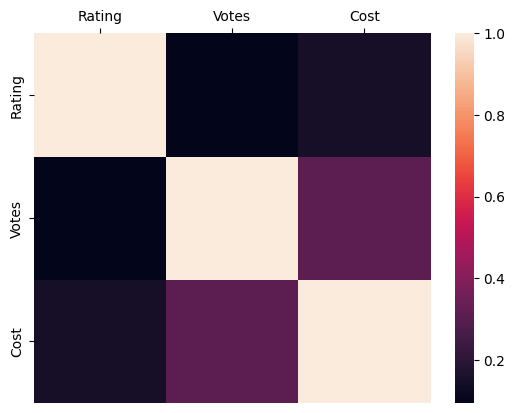

In [24]:
# calculating correlations for multivariate data
corr = stats.pearsonr(X.Rating, X.Votes)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

corr_mat = X.corr()
print(corr_mat)

plt.figure()
sns.heatmap(corr_mat, vmax=1., square=False).xaxis.tick_top()
plt.show()

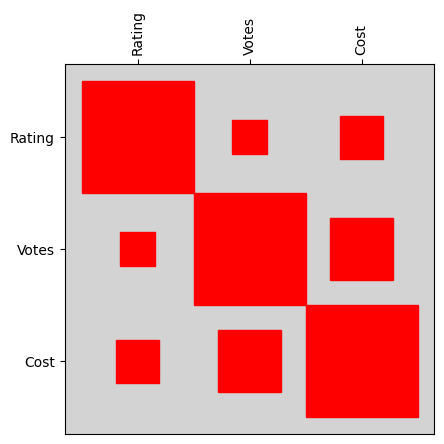

In [25]:
# Hinton diagram
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()
    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))
    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    n_ticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(n_ticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(n_ticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)
    ax.autoscale_view()
    ax.invert_yaxis()


plt.figure()
hinton(corr_mat)
plt.show()

In [26]:
def most_highly_correlated(my_dataframe, num_to_report):
    # find the correlations
    cor_matrix = my_dataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cor_matrix *= np.tri(*cor_matrix.values.shape, k=-1).T
    # find the top n correlations
    cor_matrix = cor_matrix.stack()
    cor_matrix = cor_matrix.reindex(cor_matrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cor_matrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cor_matrix.head(num_to_report)


print(most_highly_correlated(X, 9))

  FirstVariable SecondVariable  Correlation
0         Votes           Cost     0.311000
1        Rating           Cost     0.149745
2        Rating          Votes     0.094213
3        Rating         Rating     0.000000
4         Votes         Rating     0.000000
5         Votes          Votes     0.000000
6          Cost         Rating     0.000000
7          Cost          Votes     0.000000
8          Cost           Cost     0.000000


# 3. PCA and visualization

In [27]:
# standardising variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print(standardisedX.apply(np.mean))
print(standardisedX.apply(np.std))

Rating   -3.793585e-16
Votes    -1.724357e-17
Cost     -1.207050e-16
dtype: float64
Rating    1.0
Votes     1.0
Cost      1.0
dtype: float64


In [28]:
# principal component analysis
pca = PCA().fit(standardisedX)

def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        print(summary)
    return summary


summary = pca_summary(pca, standardisedX)
print(summary.sdev)
print(np.sum(summary.sdev**2))

Importance of components:
                  sdev                varprop               cumprop
    Standard deviation Proportion of Variance Cumulative Proportion
PC1           1.178181               0.462704              0.462704
PC2           0.963646               0.309538              0.772242
PC3           0.826604               0.227758              1.000000
     Standard deviation
PC1            1.178181
PC2            0.963646
PC3            0.826604
Standard deviation    3.0
dtype: float64


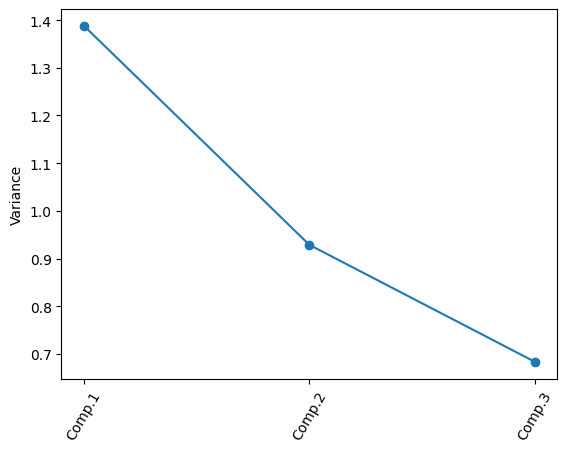

     Standard deviation
PC1            1.388111
PC2            0.928614
PC3            0.683275


In [29]:
# how many principal components to retain
def scree_plot_pca(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()


plt.figure()
scree_plot_pca(pca, standardisedX)

print(summary.sdev**2)

In [30]:
# loadings for the principal components
print(pca.components_[0])
print(np.sum(pca.components_[0]**2))


def calc_pc_pca(variables, loadings):
    # find the number of samples in the data set and the number of variables
    num_samples, num_variables = variables.shape
    # make a vector to store the component
    pc = np.zeros(num_samples)
    # calculate the value of the component for each sample
    for i in range(num_samples):
        value_i = 0
        for j in range(num_variables):
            value_ij = variables.iloc[i, j]
            loading_j = loadings[j]
            value_i = value_i + (value_ij * loading_j)
        pc[i] = value_i
    return pc


print(calc_pc_pca(standardisedX, pca.components_[0]))
print(pca.transform(standardisedX)[:, 0])

print(pca.components_[1])
print(np.sum(pca.components_[1]**2))

[0.40798667 0.62917288 0.6615802 ]
0.9999999999999996
[ 6.35141818  5.88682402 12.66247445 ... -2.16771377  0.21578219
  0.39436203]
[ 6.35141818  5.88682402 12.66247445 ... -2.16771377  0.21578219
  0.39436203]
[-0.90153433  0.39205164  0.18311571]
1.0


## Means:
              Rating     Votes      Cost
City                                    
Agra        0.224584 -0.381190  0.302982
Ahmedabad   0.171198 -0.263520 -0.454055
Bangalore  -0.086970 -0.073369 -0.249009
Chandigarh  0.073585 -0.253358 -0.164532
Chennai    -0.093946 -0.150271 -0.231119
...              ...       ...       ...
Noida       0.157670  0.310634  0.413621
Pune       -0.014280 -0.089611 -0.008474
Surat      -0.185285 -0.328153 -0.548799
Udaipur    -0.024040 -0.379890  0.025293
Vadodara    0.065179 -0.394990 -0.684508

[23 rows x 3 columns]

## Standard deviations:
              Rating     Votes      Cost
City                                    
Agra        0.925848  0.124579  1.337778
Ahmedabad   0.868635  0.272632  0.553221
Bangalore   1.208621  0.907468  0.847695
Chandigarh  1.110349  0.418447  0.752441
Chennai     1.028167  0.505193  0.851824
...              ...       ...       ...
Noida       0.665493  1.128643  1.015853
Pune        0.941601  0.729975  0.823601

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dty

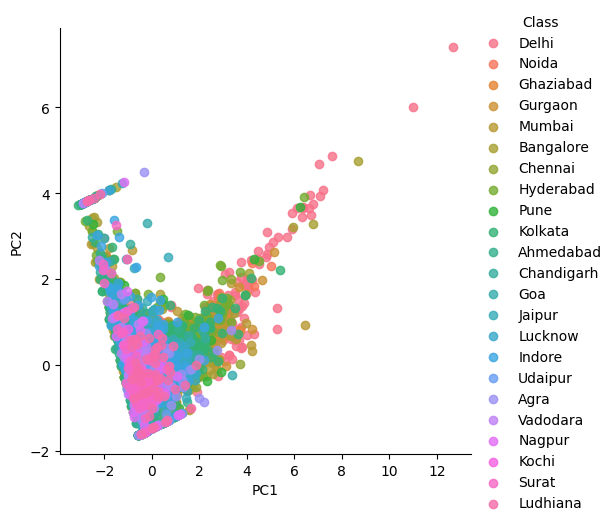

In [31]:
# scatter plots of the principal components
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot(x="PC1", y="PC2", data=bar, hue="Class", fit_reg=False)

# scatter plot of class "City"
pca_scatter(pca, standardisedX, y)
print_mean_and_sd_by_group(standardisedX, y)

# 4. LDA and visualization

In [32]:
# standardising variables
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)

print(standardisedX.apply(np.mean))
print(standardisedX.apply(np.std))

Rating   -3.793585e-16
Votes    -1.724357e-17
Cost     -1.207050e-16
dtype: float64
Rating    1.0
Votes     1.0
Cost      1.0
dtype: float64


In [33]:
# Linear Discriminant Analysis
# perform LDA
lda = LDA().fit(standardisedX, y)

def lda_summary(lda, standardised_data, out=True):
    names = ["LD"+str(i) for i in range(1, len(lda.explained_variance_ratio_)+1)]
    a = list(np.std(lda.transform(standardised_data), axis=0))
    b = list(lda.explained_variance_ratio_)
    c = [np.sum(lda.explained_variance_ratio_[:i]) for i in range(1, len(lda.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("proportion", "Proportion of Explained Variance"), ("cumprop", "Cumulative Proportion of Explained Variance")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        print(summary)
    return summary

# summarize the results
summary = lda_summary(lda, standardisedX)
print(summary.sdev)
print(np.sum(summary.sdev**2))

Importance of components:
                  sdev                       proportion  \
    Standard deviation Proportion of Explained Variance   
LD1           1.074222                         0.728332   
LD2           1.019250                         0.195958   
LD3           1.006418                         0.075709   

                                        cumprop  
    Cumulative Proportion of Explained Variance  
LD1                                    0.728332  
LD2                                    0.924291  
LD3                                    1.000000  
     Standard deviation
LD1            1.074222
LD2            1.019250
LD3            1.006418
Standard deviation    3.205702
dtype: float64


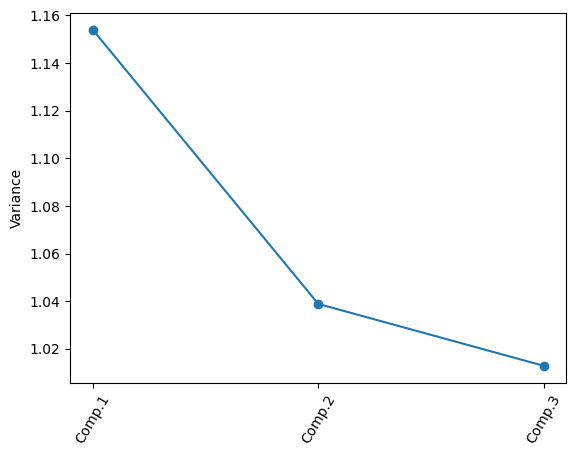

     Standard deviation
LD1            1.153953
LD2            1.038871
LD3            1.012877


In [34]:
# how many principal components to retain
def scree_plot_lda(lda, standardised_values):
    y = np.std(lda.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()
plt.figure()
scree_plot_lda(lda, standardisedX)
print(summary.sdev**2)

## Means:
              Rating     Votes      Cost
City                                    
Agra        0.224584 -0.381190  0.302982
Ahmedabad   0.171198 -0.263520 -0.454055
Bangalore  -0.086970 -0.073369 -0.249009
Chandigarh  0.073585 -0.253358 -0.164532
Chennai    -0.093946 -0.150271 -0.231119
...              ...       ...       ...
Noida       0.157670  0.310634  0.413621
Pune       -0.014280 -0.089611 -0.008474
Surat      -0.185285 -0.328153 -0.548799
Udaipur    -0.024040 -0.379890  0.025293
Vadodara    0.065179 -0.394990 -0.684508

[23 rows x 3 columns]

## Standard deviations:
              Rating     Votes      Cost
City                                    
Agra        0.925848  0.124579  1.337778
Ahmedabad   0.868635  0.272632  0.553221
Bangalore   1.208621  0.907468  0.847695
Chandigarh  1.110349  0.418447  0.752441
Chennai     1.028167  0.505193  0.851824
...              ...       ...       ...
Noida       0.665493  1.128643  1.015853
Pune        0.941601  0.729975  0.823601

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dty

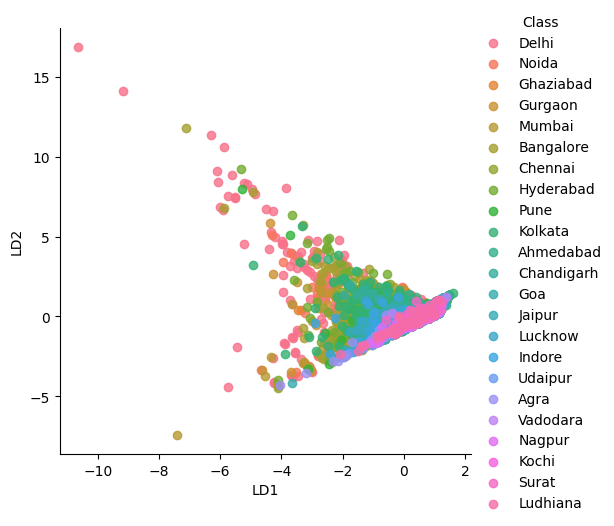

In [35]:
def lda_scatter(lda, standardised_values, classifs):
    foo = lda.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["LD1", "LD2", "Class"])
    sns.lmplot(x="LD1", y="LD2", data=bar, hue="Class", fit_reg=False)

# scatter plot of class "City"
lda_scatter(lda, standardisedX, y)
print_mean_and_sd_by_group(standardisedX, y)